# Biomed Data Analyst Training Program - Chapter 4 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import matplotlib.pyplot as plt

import mistat

# Variability in Several Dimensions and Regression Models

To demonstrate the topics of this chapter, we use the dataset `Assay stability test.csv`. 

First load the data:

In [3]:
assayStability = pd.read_csv('Assay stability test.csv')
assayStability.head()

,Condition,Month,Data
0,Up,3,0.1029
1,Up,3,0.0960
2,Up,3,0.1040
3,Up,3,0.1058
4,Up,3,0.1038


### Multiple Box-Plots

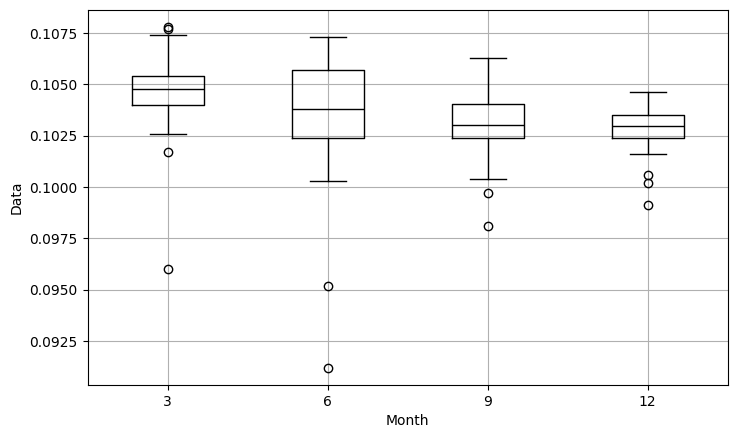

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
assayStability.boxplot(column='Data', by='Month', color='black', ax=ax)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('Month')
ax.set_ylabel('Data')
plt.show()


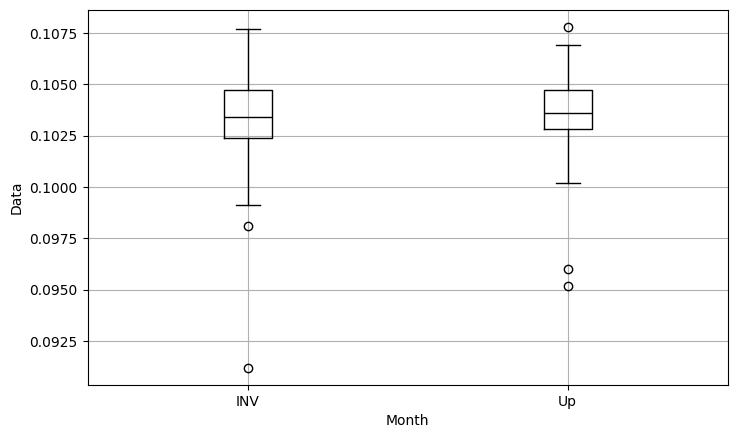

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
assayStability.boxplot(column='Data', by='Condition', color='black', ax=ax)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('Month')
ax.set_ylabel('Data')
plt.show()


## Frequency Distributions in Several Dimensions

### Bivariate Joint Frequency Distributions

In [6]:
binned_data = pd.DataFrame({
    'Condition': assayStability['Condition'],
    'Month': assayStability['Month'],
    'Data': pd.cut(assayStability['Data'], bins=6)
})
join_frequencies = pd.crosstab(binned_data['Data'],
                               binned_data['Condition'])
print(join_frequencies)

join_frequencies = pd.crosstab(binned_data['Data'],
                               binned_data['Month'])
print(join_frequencies)

Condition         INV  Up
Data                     
(0.0912, 0.094]     1   0
(0.094, 0.0967]     0   2
(0.0967, 0.0995]    2   0
(0.0995, 0.102]    20  12
(0.102, 0.105]     72  81
(0.105, 0.108]     25  25
Month             3   6   9   12
Data                            
(0.0912, 0.094]    0   1   0   0
(0.094, 0.0967]    1   1   0   0
(0.0967, 0.0995]   0   0   1   1
(0.0995, 0.102]    1   8  10  13
(0.102, 0.105]    36  30  41  46
(0.105, 0.108]    22  20   8   0


In [7]:
print('Row Totals', join_frequencies.sum(axis=1))
print('Column Totals', join_frequencies.sum(axis=0))

Row Totals Data
(0.0912, 0.094]       1
(0.094, 0.0967]       2
(0.0967, 0.0995]      2
(0.0995, 0.102]      32
(0.102, 0.105]      153
(0.105, 0.108]       50
dtype: int64
Column Totals Month
3     60
6     60
9     60
12    60
dtype: int64


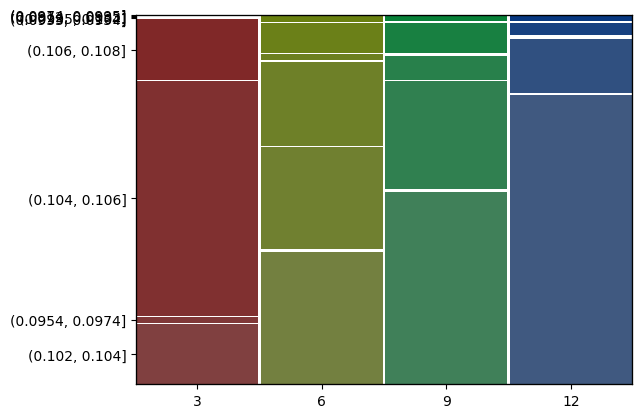

In [8]:
binned_data = pd.DataFrame({
    'Condition': assayStability['Condition'],
    'Month': assayStability['Month'],
    'Data': pd.cut(assayStability['Data'], bins=8)
})

mosaic(binned_data, ['Month', 'Data'], labelizer=lambda x: '')
plt.show()

### Conditional Distributions

In [9]:
hadpas = mistat.load_data('HADPAS')
binned_hadpas = pd.DataFrame({
  'res3': pd.cut(hadpas['res3'], bins=np.arange(1500, 2700, 200)),
  'res7': pd.cut(hadpas['res7'], bins=np.arange(1300, 2500, 200)),
})
res3_res7 = pd.crosstab(binned_hadpas['res3'], binned_hadpas['res7'])
cond_dist = 100 * res3_res7 / res3_res7.sum(axis=0)
cond_dist

res7,"(1300, 1500]","(1500, 1700]","(1700, 1900]","(1900, 2100]","(2100, 2300]"
res3,,,,,
"(1500, 1700]",100.0,44.827586,1.234568,0.000000,0.000000
"(1700, 1900]",0.0,51.724138,38.271605,1.388889,0.000000
"(1900, 2100]",0.0,3.448276,54.320988,55.555556,22.222222
"(2100, 2300]",0.0,0.000000,6.172840,43.055556,66.666667
"(2300, 2500]",0.0,0.000000,0.000000,0.000000,11.111111


## Correlation and Regression Analysis

### Covariances and Correlations

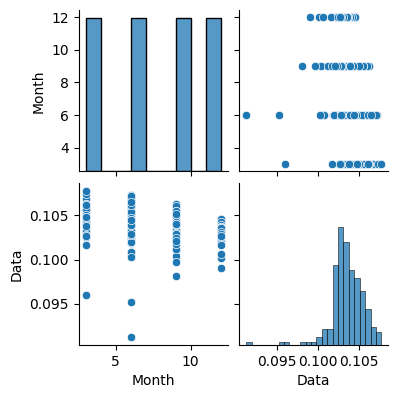

In [10]:
sns.pairplot(assayStability, height=2)
plt.show()

### Fitting Simple Regression Lines to Data

#### The Least Squares Method

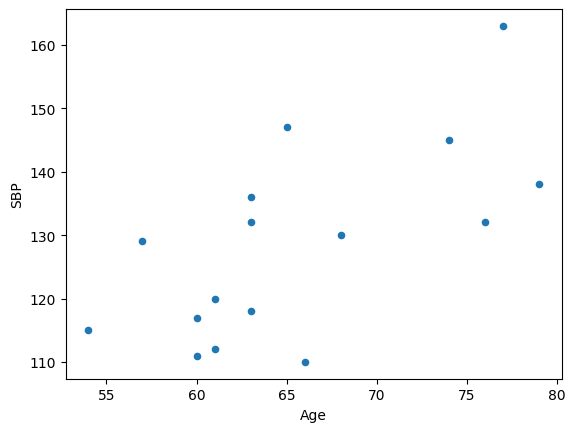

In [11]:
bloodpressure = pd.read_csv('Bloodpressure.csv')
bloodpressure.plot.scatter(x='Age', y='SBP')
plt.show()

In [12]:
# ignore UserWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [13]:
model = smf.ols(formula='SBP ~ 1 + Age', data=bloodpressure).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.397   
Dependent Variable: SBP              AIC:                125.9276
Date:               2024-06-03 13:51 BIC:                127.4728
No. Observations:   16               Log-Likelihood:     -60.964 
Df Model:           1                F-statistic:        10.88   
Df Residuals:       14               Prob (F-statistic): 0.00527 
R-squared:          0.437            Scale:              136.47  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     40.7907   26.7276  1.5262  0.1492  -16.5344  98.1157
Age            1.3394    0.4060  3.2990  0.0053    0.4686   2.2102
-----------------------------------------------------------------
Omnibus:              0.772        Durbin-Watson:           2.021
Prob(Omnibus):        

In [14]:
# restore default setting
warnings.simplefilter('default', category=UserWarning)

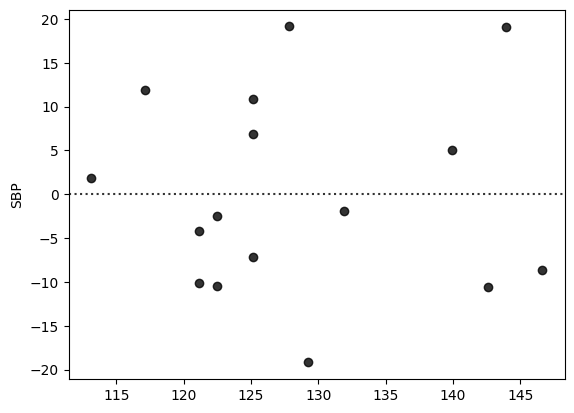

In [15]:
sns.residplot(x=model.predict(bloodpressure), y=bloodpressure['SBP'], lowess=False, color='black')
plt.show()

#### Regression and Prediction Intervals

In [16]:
new_data = pd.DataFrame({'Age': [60, 65, 70, 75]})
result = model.get_prediction(new_data)

columns = ['Age', 'mean', 'obs_ci_lower', 'obs_ci_upper']

for alpha in (0.01, 0.05):
    print(f'Alpha {alpha}')
    predictions = pd.concat([new_data, result.summary_frame(alpha=0.01)], axis=1)
    print(predictions[columns].round(3))
    print()


Alpha 0.01
   Age     mean  obs_ci_lower  obs_ci_upper
0   60  121.155        84.711       157.598
1   65  127.852        92.001       163.702
2   70  134.549        98.281       170.816
3   75  141.245       103.582       178.909

Alpha 0.05
   Age     mean  obs_ci_lower  obs_ci_upper
0   60  121.155        84.711       157.598
1   65  127.852        92.001       163.702
2   70  134.549        98.281       170.816
3   75  141.245       103.582       178.909



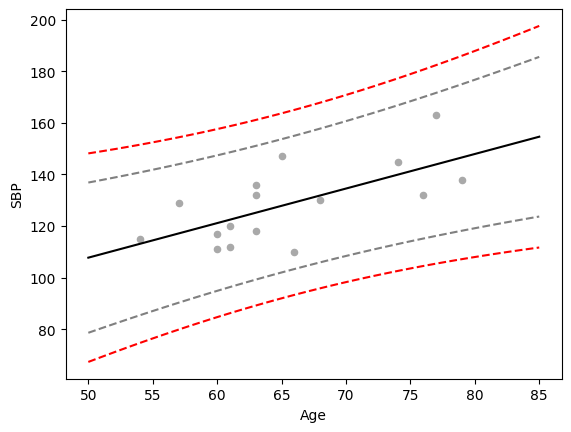

In [17]:
# print(model.summary())# hadpas = mistat.load_data('HADPAS')
# ax = hadpas.plot.scatter(x='res7', y='res3', color='darkgrey')
ax = bloodpressure.plot.scatter(x='Age', y='SBP', color='darkgrey')

# model = smf.ols(formula='res3 ~ 1 + res7', data=hadpas).fit()
# sm.graphics.abline_plot(model_results=model, ax=ax, color='black')

newdata = pd.DataFrame({'Age': np.linspace(50, 85)})
predictions = model.get_prediction(newdata)
predIntervals = predictions.summary_frame(alpha=0.05)
ax.plot(newdata['Age'], predIntervals['mean'], color='black', linestyle='-')
ax.plot(newdata['Age'], predIntervals['obs_ci_upper'], color='grey', linestyle='--')
ax.plot(newdata['Age'], predIntervals['obs_ci_lower'], color='grey', linestyle='--')
predIntervals = predictions.summary_frame(alpha=0.01)
ax.plot(newdata['Age'], predIntervals['obs_ci_upper'], color='red', linestyle='--')
ax.plot(newdata['Age'], predIntervals['obs_ci_lower'], color='red', linestyle='--')
plt.show()

## Multiple Regression

### Regression on Two Variables

In [18]:
# ignore UserWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [19]:
model2 = smf.ols(formula='SBP ~ Age + Weight + 1', data=bloodpressure).fit()
print(model2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.443   
Dependent Variable: SBP              AIC:                125.4844
Date:               2024-06-03 13:51 BIC:                127.8021
No. Observations:   16               Log-Likelihood:     -59.742 
Df Model:           2                F-statistic:        6.959   
Df Residuals:       13               Prob (F-statistic): 0.00882 
R-squared:          0.517            Scale:              126.16  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     42.7498   25.7325  1.6613  0.1206  -12.8419  98.3414
Age            0.8446    0.5163  1.6360  0.1258   -0.2707   1.9599
Weight         0.3894    0.2659  1.4645  0.1668   -0.1850   0.9637
-----------------------------------------------------------------
Omnibus:             

In [20]:
# restore default setting
warnings.simplefilter('default', category=UserWarning)

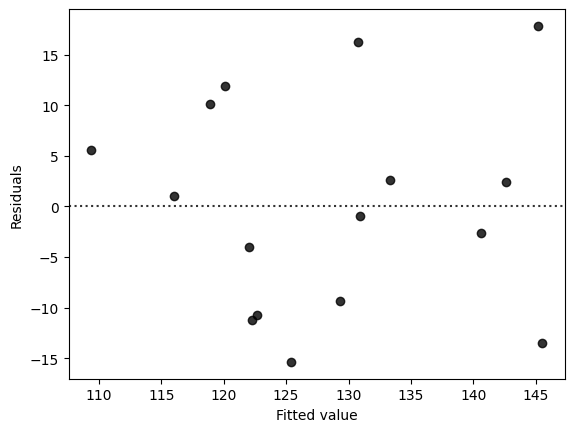

In [21]:
ax = sns.residplot(x=model2.predict(bloodpressure), y=bloodpressure['SBP'], lowess=False, color='black')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residuals')
plt.show()

### Multiple Linear Regression

In [22]:
model = smf.ols('SBP ~ 1 + Age + Weight', data=bloodpressure).fit()
print(model.summary2())
print()
print(sms.anova.anova_lm(model))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.443   
Dependent Variable: SBP              AIC:                125.4844
Date:               2024-06-03 13:51 BIC:                127.8021
No. Observations:   16               Log-Likelihood:     -59.742 
Df Model:           2                F-statistic:        6.959   
Df Residuals:       13               Prob (F-statistic): 0.00882 
R-squared:          0.517            Scale:              126.16  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     42.7498   25.7325  1.6613  0.1206  -12.8419  98.3414
Age            0.8446    0.5163  1.6360  0.1258   -0.2707   1.9599
Weight         0.3894    0.2659  1.4645  0.1668   -0.1850   0.9637
-----------------------------------------------------------------
Omnibus:             

/usr/local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


# Assay stability test

In [23]:
assayStability = pd.read_csv('Assay stability test.csv')
assayStability_Up = assayStability[assayStability['Condition'] == 'Up']
assayStability_INV = assayStability[assayStability['Condition'] == 'INV']

model_Up = smf.ols('Data ~ 1 + Month', data=assayStability_Up).fit()
model_INV = smf.ols('Data ~ 1 + Month', data=assayStability_INV).fit()
model_Combined = smf.ols('Data ~ 1 + Month', data=assayStability).fit()
params = pd.DataFrame({
    'Up': model_Up.params,
    'INV': model_INV.params,
    'Combined': model_Combined.params,
})
print(params)

                 Up       INV  Combined
Intercept  0.104670  0.105323  0.104997
Month     -0.000134 -0.000245 -0.000189


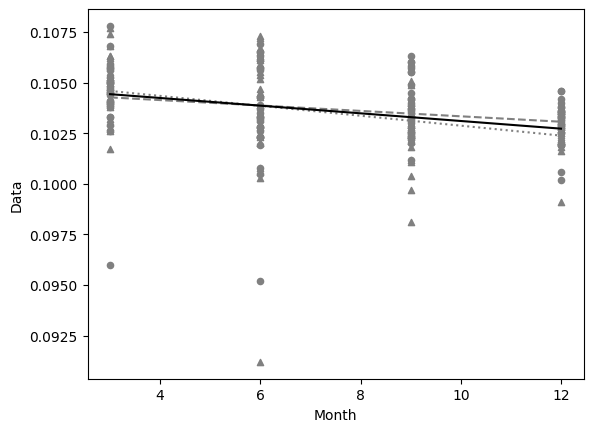

In [24]:
# create visualization
ax = assayStability_Up.plot.scatter(x='Month', y='Data', color='gray', marker='o')
assayStability_INV.plot.scatter(x='Month', y='Data', ax=ax, color='gray', marker='^')

ax.plot(assayStability['Month'], model_Up.predict(assayStability),
        color='gray', linestyle='--')
ax.plot(assayStability['Month'], model_INV.predict(assayStability),
        color='gray', linestyle=':')
ax.plot(assayStability['Month'], model_Combined.predict(assayStability),
        color='black', linestyle='-')
plt.show()


### Regression Diagnostics

In [25]:
bloodpressure = pd.read_csv('Bloodpressure.csv')

model = smf.ols(formula='SBP ~ 1 + Age + Weight', data=bloodpressure).fit()
influence = model.get_influence()
# leverage: influence.hat_matrix_diag
# std. residuals: influence.resid_studentized
# Cook-s distance: influence.cooks_distance[0]
# DFIT: influence.dffits[0]

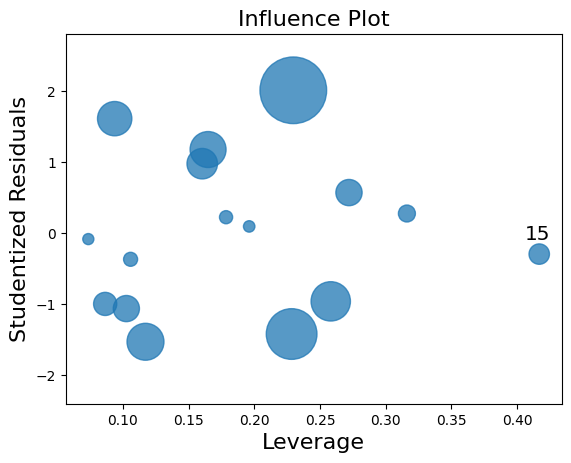

In [26]:
sm.graphics.influence_plot(model)
ax = plt.gca()
ax.set_ylim(-2.4, 2.8)
plt.show()

In [27]:
leverage = influence.hat_matrix_diag
print(f'average leverage: {np.mean(leverage):.3f}')
print(f'point #8: {leverage[8]:.3f}')
print(f'point #5: {leverage[5]:.3f}')

average leverage: 0.188
point #8: 0.316
point #5: 0.074


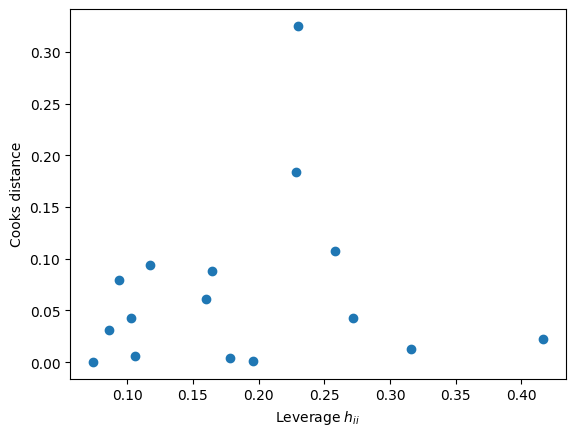

In [28]:
influence = model.get_influence()
plt.scatter(influence.hat_matrix_diag, influence.summary_frame()['cooks_d'])
ax = plt.gca()
ax.set_xlabel('Leverage $h_{ii}$')
ax.set_ylabel('Cook''s distance')
plt.show()

## The Analysis of Variance:  The Comparison of Means

### The Statistical Model

### The One-Way Analysis of Variance (ANOVA)

In [29]:
tomatoes = pd.read_csv('Yield of tomatoes.CSV')
tomatoes = tomatoes.rename(columns={'yield': 'Yield'})

                  0          1
treat[A]  14.463683  27.216317
treat[B]  16.712579  28.354088
treat[A]    6.376317
treat[B]    5.820755
dtype: float64


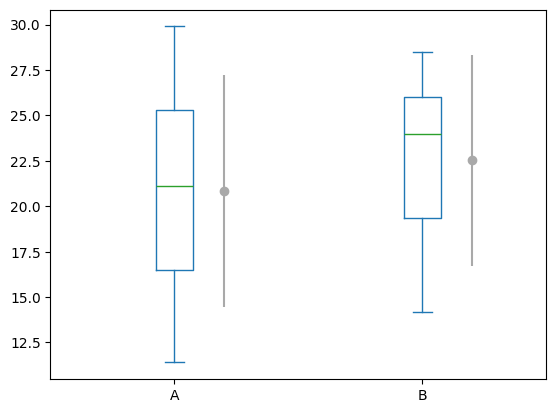

In [30]:
fig, ax = plt.subplots()
tomatoes.plot.box(column='Yield', by='treat', ax=ax)

ax.set_title('')
ax.get_figure().suptitle('')
model = smf.ols('Yield ~ -1 + treat', data=tomatoes).fit()
ci = model.conf_int()
print(ci)
err = 0.5 * (ci[1] - ci[0])
print(err)
ax.errorbar([1.2, 2.2], model.params, yerr=err,  fmt='o', color='darkgrey')
plt.show()

In [31]:
model = smf.ols('Yield ~ treat', data=tomatoes).fit()
table = sm.stats.anova_lm(model, typ=1)
print(table)

           df      sum_sq    mean_sq         F    PR(>F)
treat     1.0    7.820121   7.820121  0.196856  0.667745
Residual  9.0  357.525333  39.725037       NaN       NaN


In [32]:
model = smf.ols('Yield ~ -1 + treat', data=tomatoes).fit()
print(model.conf_int())

                  0          1
treat[A]  14.463683  27.216317
treat[B]  16.712579  28.354088


## Simultaneous Confidence Intervals:  Multiple Comparisons

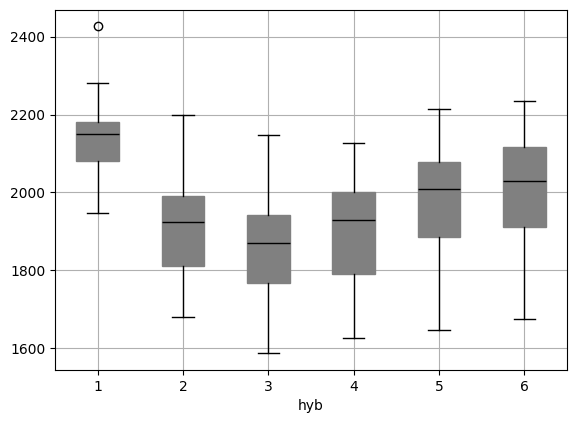

In [33]:
hadpas = mistat.load_data('HADPAS')
ax = hadpas.boxplot(column='res3', by='hyb',
                    color={'boxes': 'grey', 'medians': 'black', 'whiskers': 'black'},
                    patch_artist=True)
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('hyb')
plt.show()

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hadpas = mistat.load_data('HADPAS')
mod = pairwise_tukeyhsd(hadpas['res3'], hadpas['hyb'])
print(mod)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2 -240.5938    0.0 -336.8754 -144.3121   True
     1      3 -293.0625    0.0 -389.3442 -196.7808   True
     1      4    -243.0    0.0 -339.2817 -146.7183   True
     1      5 -162.8438    0.0 -259.1254  -66.5621   True
     1      6    -129.5  0.002 -225.7817  -33.2183   True
     2      3  -52.4688 0.6198 -148.7504   43.8129  False
     2      4   -2.4062    1.0  -98.6879   93.8754  False
     2      5     77.75 0.1892  -18.5317  174.0317  False
     2      6  111.0938 0.0135   14.8121  207.3754   True
     3      4   50.0625 0.6664  -46.2192  146.3442  False
     3      5  130.2188 0.0019   33.9371  226.5004   True
     3      6  163.5625    0.0   67.2808  259.8442   True
     4      5   80.1562 0.1625  -16.1254  176.4379  False
     4      6     113.5 0.0107   17.2183  209.7817   True
     5      6 